In [164]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
import pandas as pd
occupation_label = "occupation_recruitment_needs-frisör.csv"
occupation_dataframe_day = pd.read_csv(occupation_label)
df = pd.read_csv(occupation_label)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')
occupation_dataframe_month = df.resample('M').sum()
occupation_dataframe_quarter = df.resample('QS').sum()

In [112]:
occupation_dataframe_day

DateTime  Occurrences
0     2016-01-01            1
1     2016-01-02            3
2     2016-01-03            0
3     2016-01-04           24
4     2016-01-05           10
...          ...          ...
2825  2023-09-26            6
2826  2023-09-27           13
2827  2023-09-28            7
2828  2023-09-29            0
2829  2023-09-30            3

[2830 rows x 2 columns]

In [113]:
occupation_dataframe_month

Occurrences
DateTime               
2016-01-31          263
2016-02-29          294
2016-03-31          284
2016-04-30          278
2016-05-31          268
...                 ...
2023-05-31          122
2023-06-30          122
2023-07-31          107
2023-08-31          151
2023-09-30          135

[93 rows x 1 columns]

In [114]:
occupation_dataframe_quarter

Occurrences
DateTime               
2016-01-01          841
2016-04-01          726
2016-07-01          691
2016-10-01          540
2017-01-01          765
2017-04-01          701
2017-07-01          647
2017-10-01          478
2018-01-01          605
2018-04-01          586
2018-07-01          590
2018-10-01          523
2019-01-01          618
2019-04-01          487
2019-07-01          457
2019-10-01          386
2020-01-01          300
2020-04-01          186
2020-07-01          350
2020-10-01          210
2021-01-01          258
2021-04-01          396
2021-07-01          521
2021-10-01          429
2022-01-01          557
2022-04-01          593
2022-07-01          543
2022-10-01          302
2023-01-01          402
2023-04-01          398
2023-07-01          393

In [115]:
from darts import TimeSeries

In [116]:
series = TimeSeries.from_dataframe(occupation_dataframe_quarter, value_cols = 'Occurrences')

In [117]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

In [118]:
train, val = series.split_before(0.8)
model = ExponentialSmoothing()
model.fit(series)
predict = model.predict(len(val))

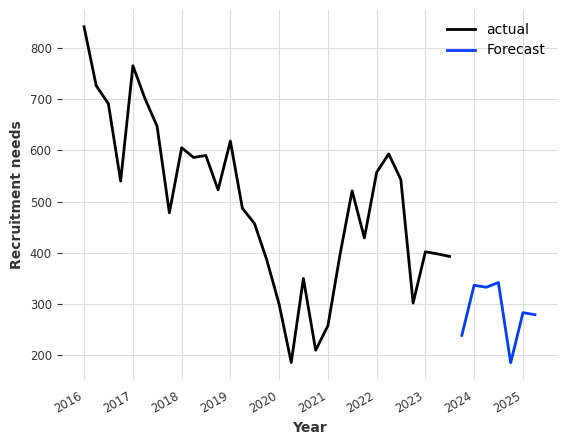

In [119]:
import matplotlib.pyplot as plt

series.plot(label='actual')
predict.plot(label='Forecast', low_quantile=0.05, high_quantile=0.95)
plt.xlabel("Year")
plt.ylabel("Recruitment needs")
plt.legend()

In [120]:
train_exp_smooth, val_exp_smooth = series.split_before(0.8)
model_exp_smooth = ExponentialSmoothing()
model_exp_smooth.fit(train_exp_smooth)
prediction_exp_smooth = model_exp_smooth.predict(len(val_exp_smooth))

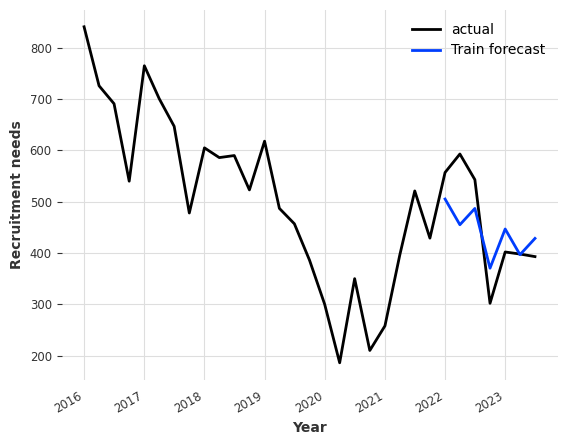

In [121]:
series.plot(label='actual')
prediction_exp_smooth.plot(label='Train forecast', low_quantile=0.05, high_quantile=0.95)
plt.xlabel("Year")
plt.ylabel("Recruitment needs")
plt.legend()

In [122]:
from darts.models import Theta
series = TimeSeries.from_dataframe(occupation_dataframe_month, value_cols = 'Occurrences')

In [123]:
train_theta, val_theta = series.split_before(0.8)
model = Theta()
model.fit(series)
predict = model.predict(len(val_theta))

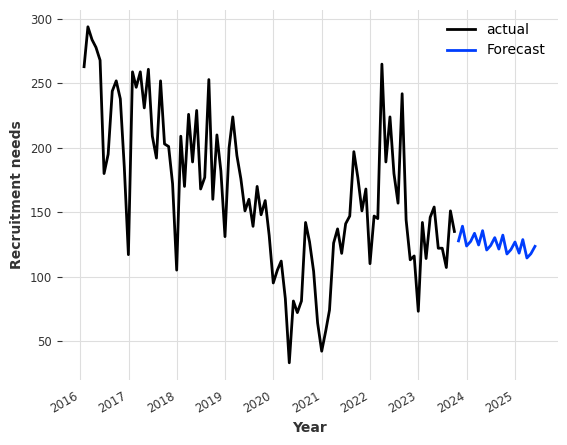

In [124]:
series.plot(label='actual')
predict.plot(label='Forecast', low_quantile=0.05, high_quantile=0.95)
plt.xlabel("Year")
plt.ylabel("Recruitment needs")
plt.legend()

In [125]:
train_theta, val_theta = series.split_before(0.8)
model_theta = Theta()
model_theta.fit(train_theta)
prediction = model_theta.predict(len(val_theta))

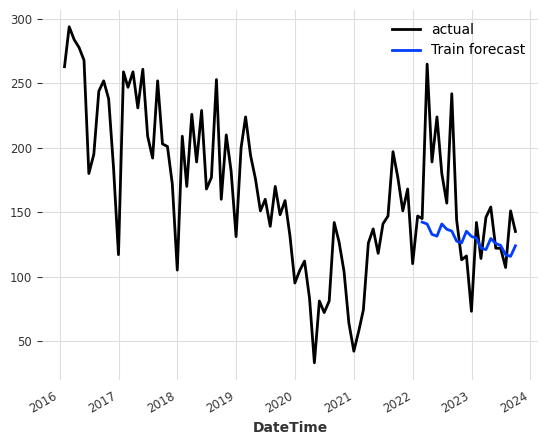

In [126]:
series.plot(label='actual')
prediction.plot(label='Train forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
from darts.models import ARIMA

In [ ]:
train_arima, val_arima = series.split_before(0.75)
model_arima = ARIMA()
model_arima.fit(train_arima)
prediction = model_arima.predict(len(val_arima))